In [29]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [30]:
import os
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('Dataset/AirBNB.csv')

In [32]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [33]:
df.describe()

,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


# EDA
# 1. HANDLING MISSING VALUES

In [35]:
df.isnull().sum() /len(df) * 100

id                       0.000000
room_type                0.006747
accommodates             0.004048
bathrooms                0.273913
cancellation_policy      0.010795
cleaning_fee             0.005397
instant_bookable         0.000000
review_scores_rating    22.563452
bedrooms                 0.124138
beds                     0.176762
log_price                0.000000
dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [38]:
df['room_type'] = df['room_type'].fillna(df['room_type'].mode()[0])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [40]:
df['room_type'].mode()[0]

'Entire home/apt'

In [41]:
df['room_type'].value_counts()

room_type
Entire home/apt    41313
Private room       30635
Shared room         2163
Name: count, dtype: int64

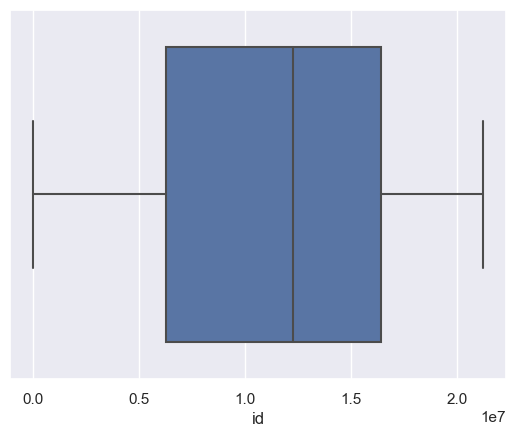

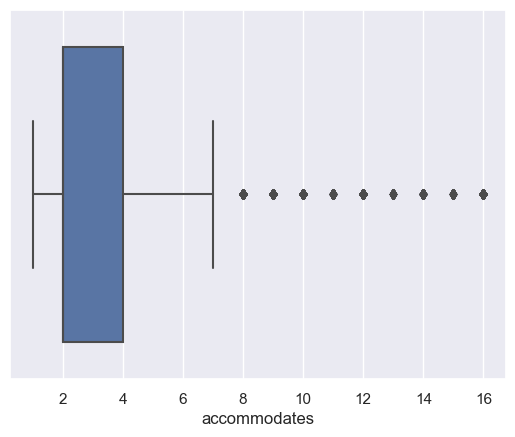

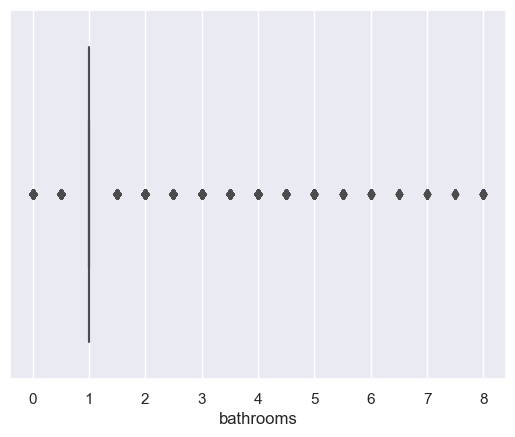

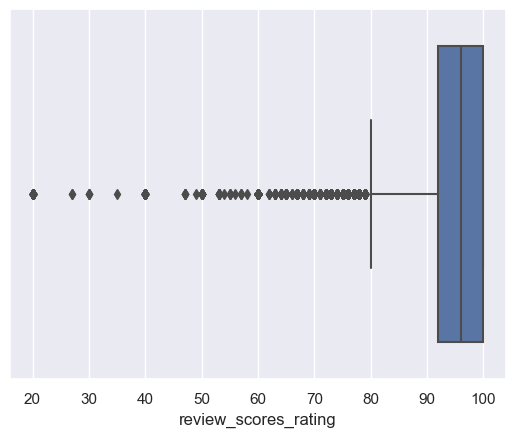

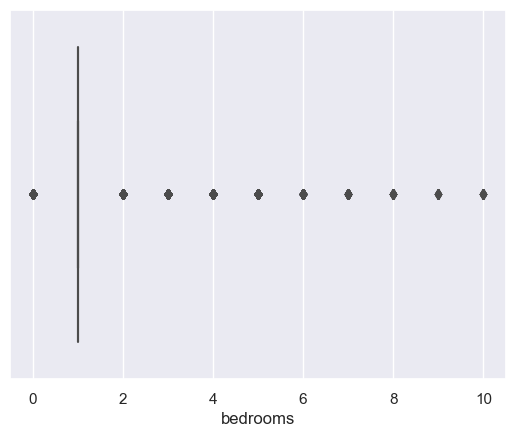

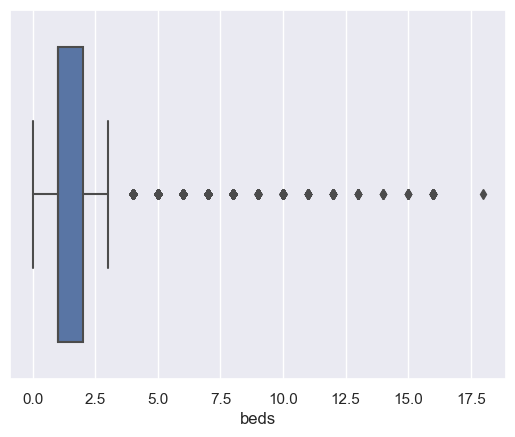

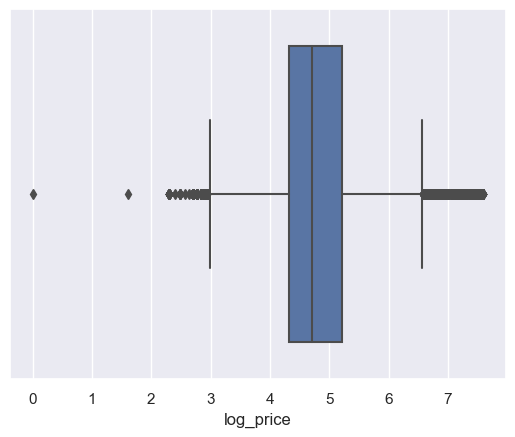

In [42]:
def boxplot(col):
    sns.boxplot(x = df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude = 'object').columns):
    boxplot(i)

In [45]:
df['accommodates'] = df['accommodates'].fillna(df['accommodates'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0])
df['cleaning_fee'] = df['cleaning_fee'].fillna(df['cleaning_fee'].mode()[0])
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['beds'] = df['beds'].fillna(df['beds'].median())

In [46]:
df.isnull().sum()

id                      0
room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

# 2.encoding

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74111 non-null  object 
 2   accommodates          74111 non-null  float64
 3   bathrooms             74111 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  74111 non-null  float64
 8   bedrooms              74111 non-null  float64
 9   beds                  74111 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


In [317]:
df['room_type'].nunique()

3

In [318]:
df_new = df

In [319]:
df_new['room_type'] = df_new['room_type'].astype('category')
df_new['room_type'] = df_new['room_type'].cat.codes

In [320]:
df_new['room_type'].head()

0    0
1    0
2    0
3    0
4    0
Name: room_type, dtype: int8

In [321]:
df_new['room_type'].value_counts()

room_type
0    41313
1    30635
2     2163
Name: count, dtype: int64

In [322]:
# Anova testing
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [323]:
ols_model = ols('log_price~room_type' , data = df_new).fit()
anova_result = sm.stats.anova_lm(ols_model)
print(anova_result)

                df        sum_sq       mean_sq             F  PR(>F)
room_type      1.0  14057.671628  14057.671628  43258.146607     0.0
Residual   74109.0  24083.324608      0.324972           NaN     NaN


In [324]:
df = pd.get_dummies(df , columns = ['room_type'] , dtype = int)

In [325]:
df.head()

,id,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2
0,6901257,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635,1,0,0
1,6304928,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899,1,0,0
2,7919400,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734,1,0,0
3,13418779,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073,1,0,0
4,3808709,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932,1,0,0


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   accommodates          74111 non-null  float64
 2   bathrooms             74111 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  74111 non-null  float64
 7   bedrooms              74111 non-null  float64
 8   beds                  74111 non-null  float64
 9   log_price             74111 non-null  float64
 10  room_type_0           74111 non-null  int32  
 11  room_type_1           74111 non-null  int32  
 12  room_type_2           74111 non-null  int32  
dtypes: float64(6), int32(3), int64(1), object(3)
memory usage: 6.5+ MB


In [327]:
df['cancellation_policy'].value_counts()

cancellation_policy
strict      32500
flexible    22543
moderate    19060
Name: count, dtype: int64

In [328]:
df_new['cancellation_policy'] = df_new['cancellation_policy'].astype('category')
df_new['cancellation_policy'] = df_new['cancellation_policy'].cat.codes

In [329]:
ols_model_cancellation = ols('cancellation_policy~room_type' , data = df_new).fit()
anova_result_can = sm.stats.anova_lm(ols_model_cancellation)
print(anova_result_can)

                df        sum_sq      mean_sq            F  PR(>F)
room_type      1.0   1606.579546  1606.579546  2283.726407     0.0
Residual   74109.0  52134.968186     0.703490          NaN     NaN


In [330]:
df = pd.get_dummies(df , columns = ['cancellation_policy'] , dtype = int)

In [331]:
df.head()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,6901257,3.0,1.0,True,f,100.0,1.0,1.0,5.010635,1,0,0,0,0,1
1,6304928,7.0,1.0,True,t,93.0,3.0,3.0,5.129899,1,0,0,0,0,1
2,7919400,5.0,1.0,True,t,92.0,1.0,3.0,4.976734,1,0,0,0,1,0
3,13418779,4.0,1.0,True,f,96.0,2.0,2.0,6.620073,1,0,0,1,0,0
4,3808709,2.0,1.0,True,t,40.0,0.0,1.0,4.744932,1,0,0,0,1,0


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            74111 non-null  int64  
 1   accommodates                  74111 non-null  float64
 2   bathrooms                     74111 non-null  float64
 3   cleaning_fee                  74107 non-null  object 
 4   instant_bookable              74111 non-null  object 
 5   review_scores_rating          74111 non-null  float64
 6   bedrooms                      74111 non-null  float64
 7   beds                          74111 non-null  float64
 8   log_price                     74111 non-null  float64
 9   room_type_0                   74111 non-null  int32  
 10  room_type_1                   74111 non-null  int32  
 11  room_type_2                   74111 non-null  int32  
 12  cancellation_policy_flexible  74111 non-null  int32  
 13  c

In [333]:
df['cleaning_fee'].value_counts()

cleaning_fee
True     54399
False    19708
Name: count, dtype: int64

In [334]:
df['cleaning_fee'] = df['cleaning_fee'].astype('category')
df['cleaning_fee'] = df['cleaning_fee'].cat.codes

In [335]:
df.head()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,6901257,3.0,1.0,1,f,100.0,1.0,1.0,5.010635,1,0,0,0,0,1
1,6304928,7.0,1.0,1,t,93.0,3.0,3.0,5.129899,1,0,0,0,0,1
2,7919400,5.0,1.0,1,t,92.0,1.0,3.0,4.976734,1,0,0,0,1,0
3,13418779,4.0,1.0,1,f,96.0,2.0,2.0,6.620073,1,0,0,1,0,0
4,3808709,2.0,1.0,1,t,40.0,0.0,1.0,4.744932,1,0,0,0,1,0


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            74111 non-null  int64  
 1   accommodates                  74111 non-null  float64
 2   bathrooms                     74111 non-null  float64
 3   cleaning_fee                  74111 non-null  int8   
 4   instant_bookable              74111 non-null  object 
 5   review_scores_rating          74111 non-null  float64
 6   bedrooms                      74111 non-null  float64
 7   beds                          74111 non-null  float64
 8   log_price                     74111 non-null  float64
 9   room_type_0                   74111 non-null  int32  
 10  room_type_1                   74111 non-null  int32  
 11  room_type_2                   74111 non-null  int32  
 12  cancellation_policy_flexible  74111 non-null  int32  
 13  c

In [337]:
df['instant_bookable'].value_counts()

instant_bookable
f    54660
t    19451
Name: count, dtype: int64

In [338]:
df['instant_bookable'] = df['instant_bookable'].astype('category')
df['instant_bookable'] = df['instant_bookable'].cat.codes

In [339]:
df.head()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,6901257,3.0,1.0,1,0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1
1,6304928,7.0,1.0,1,1,93.0,3.0,3.0,5.129899,1,0,0,0,0,1
2,7919400,5.0,1.0,1,1,92.0,1.0,3.0,4.976734,1,0,0,0,1,0
3,13418779,4.0,1.0,1,0,96.0,2.0,2.0,6.620073,1,0,0,1,0,0
4,3808709,2.0,1.0,1,1,40.0,0.0,1.0,4.744932,1,0,0,0,1,0


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            74111 non-null  int64  
 1   accommodates                  74111 non-null  float64
 2   bathrooms                     74111 non-null  float64
 3   cleaning_fee                  74111 non-null  int8   
 4   instant_bookable              74111 non-null  int8   
 5   review_scores_rating          74111 non-null  float64
 6   bedrooms                      74111 non-null  float64
 7   beds                          74111 non-null  float64
 8   log_price                     74111 non-null  float64
 9   room_type_0                   74111 non-null  int32  
 10  room_type_1                   74111 non-null  int32  
 11  room_type_2                   74111 non-null  int32  
 12  cancellation_policy_flexible  74111 non-null  int32  
 13  c

# 3.Outlier Treatment`

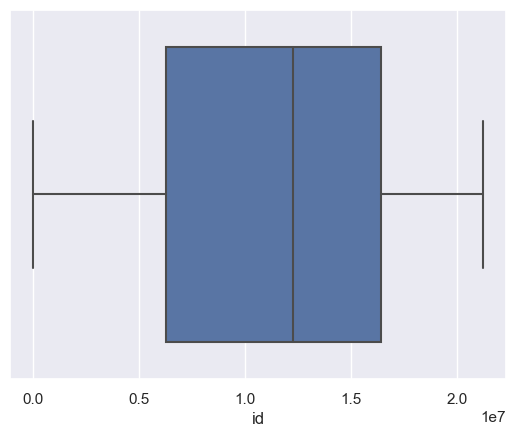

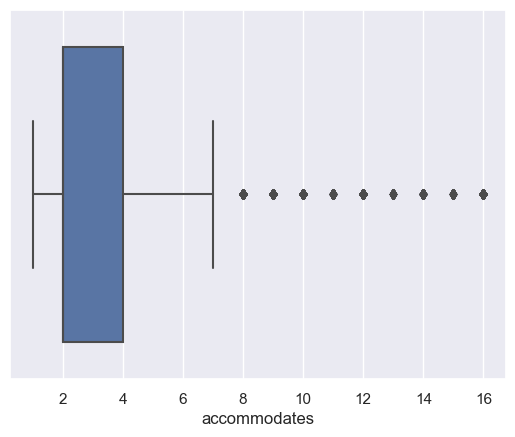

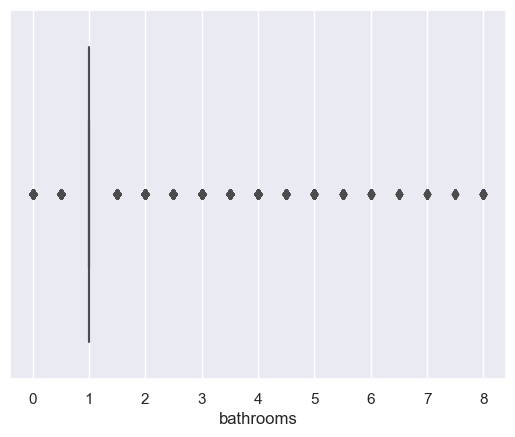

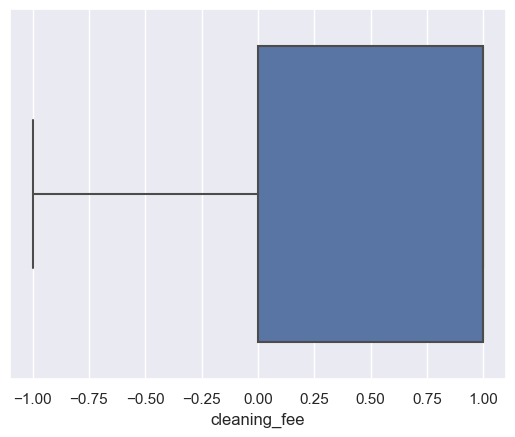

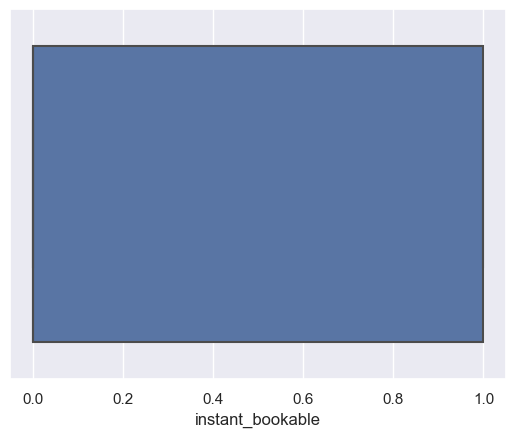

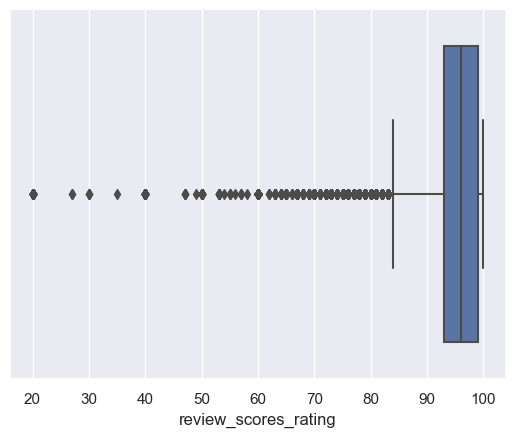

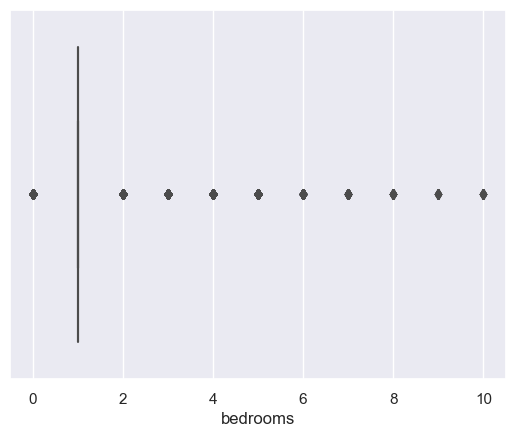

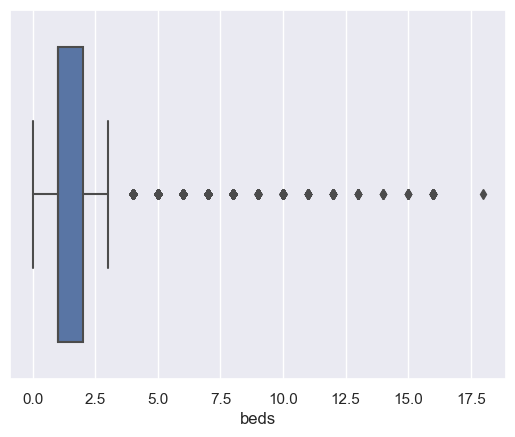

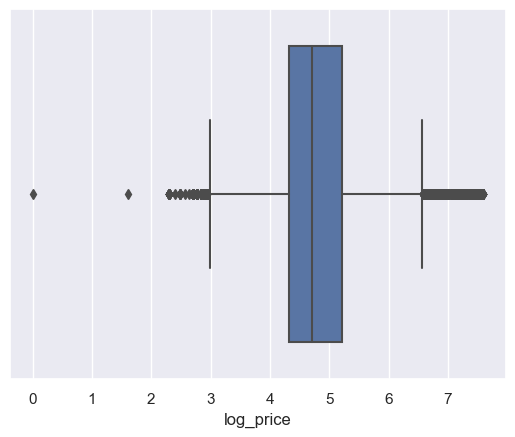

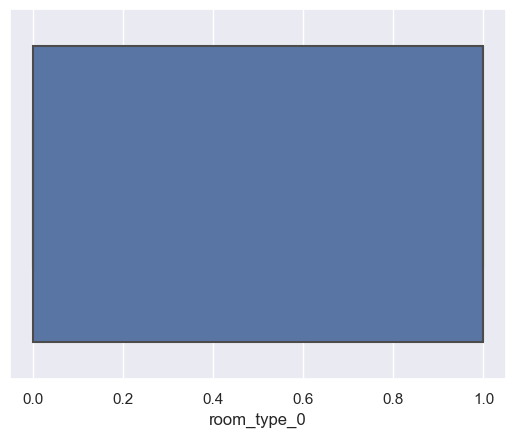

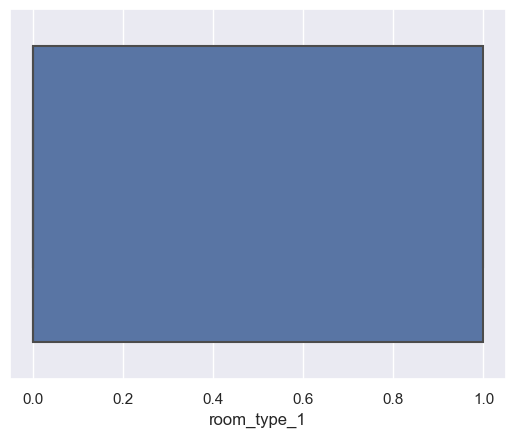

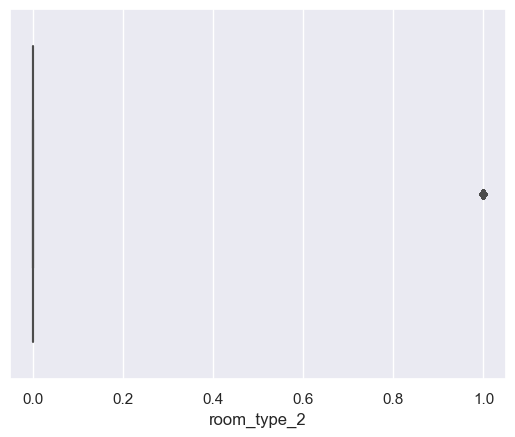

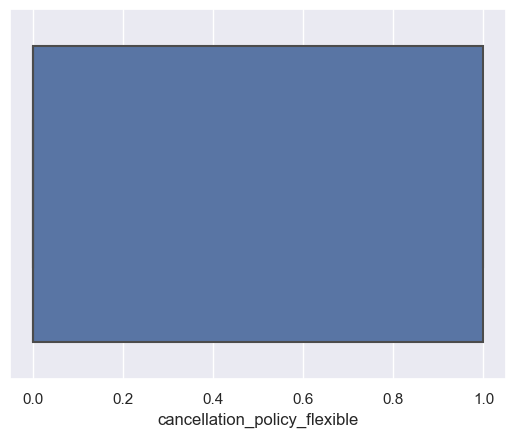

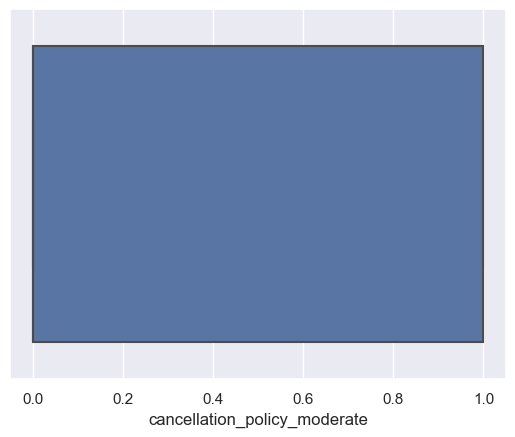

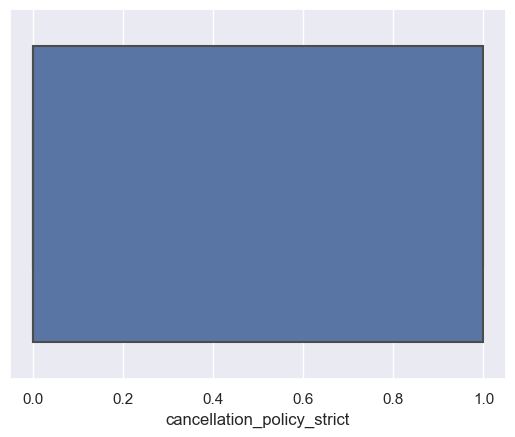

In [341]:
def boxplot(col):
    sns.boxplot( x = df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = 'object').columns):
    boxplot(i)

In [342]:
def min_max(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    minv = q1 - 1.5* iqr
    maxv = q3 + 1.5* iqr
    df[col] = np.where(df[col] < minv , minv , np.where(df[col] > maxv , maxv , df[col]))
a = ['accommodates', 'bathrooms','review_scores_rating', 'bedrooms', 'beds', 'log_price' , 'room_type_2']
for i in a:
    min_max(i)

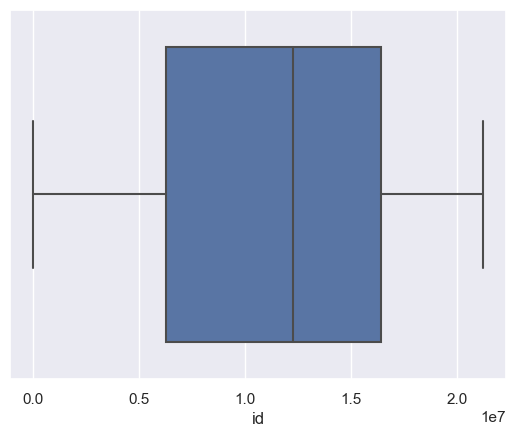

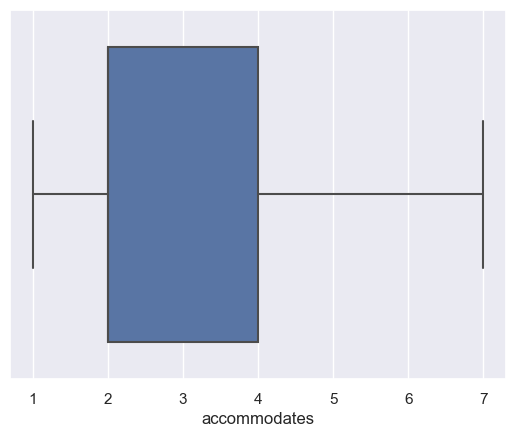

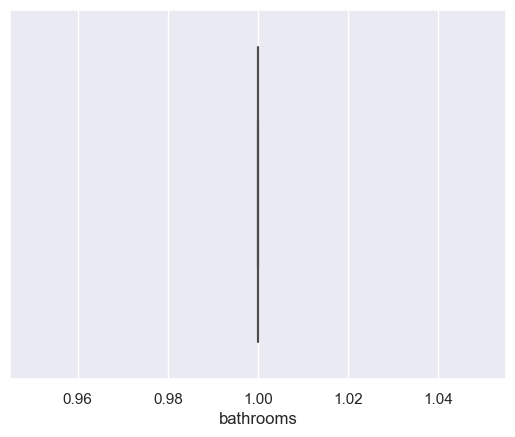

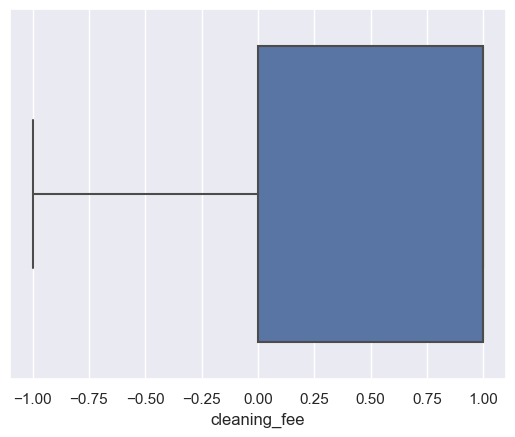

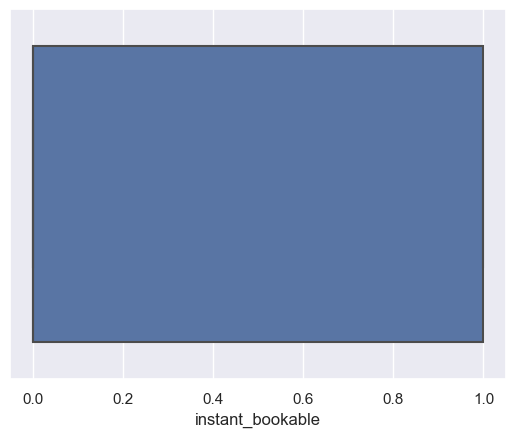

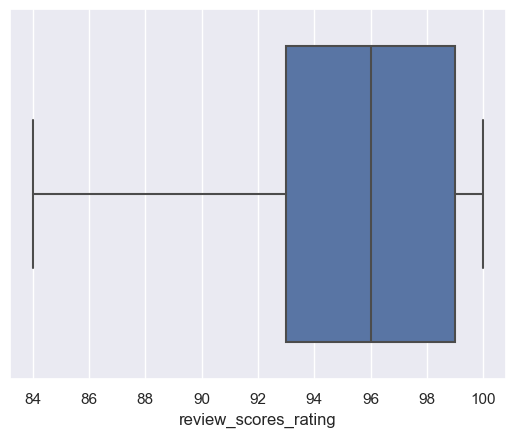

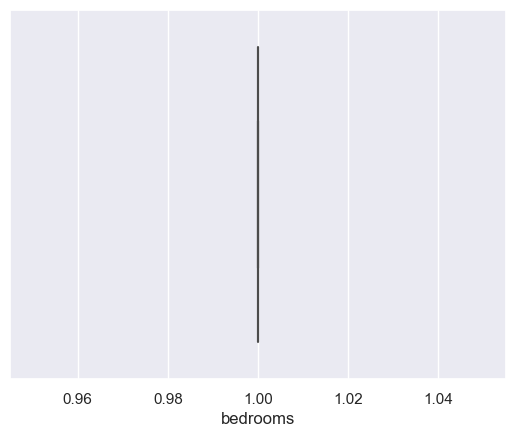

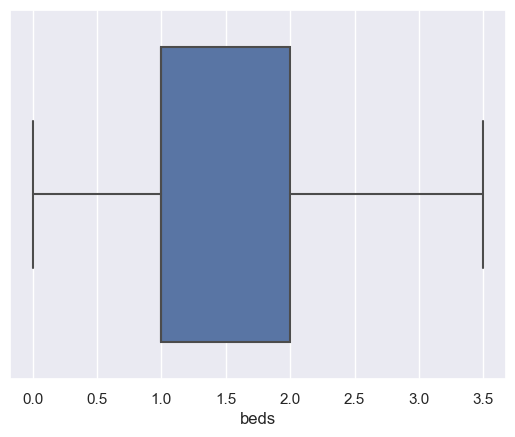

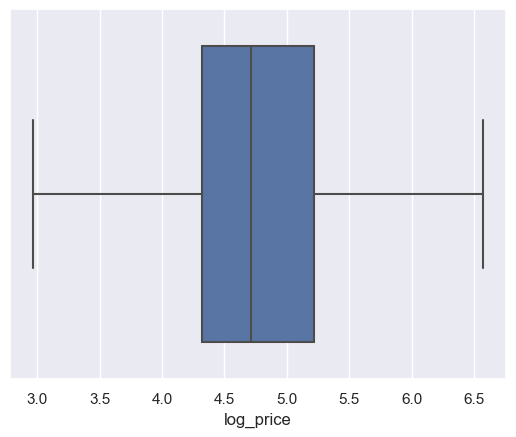

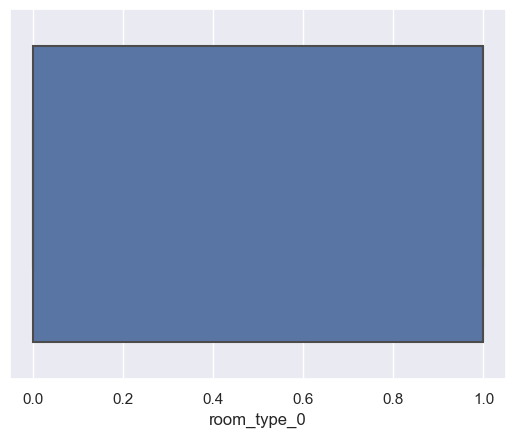

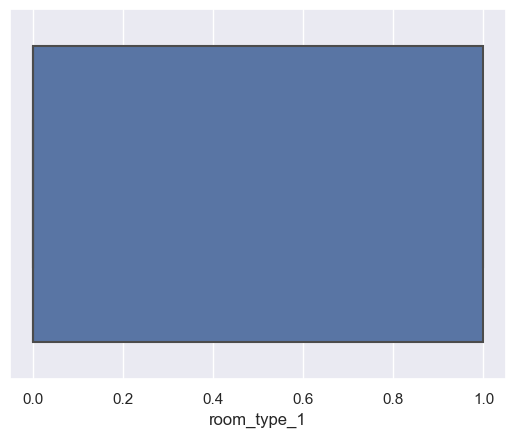

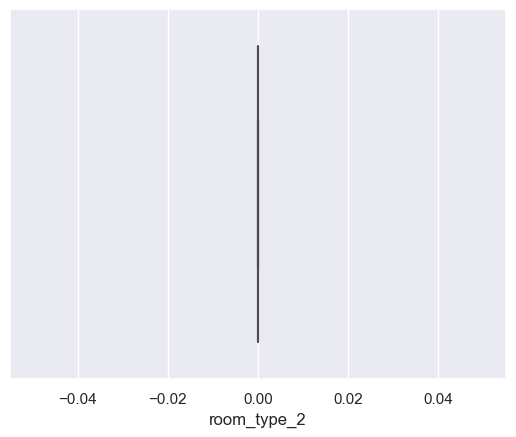

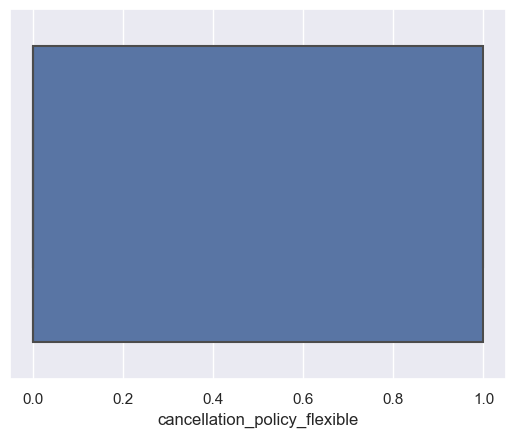

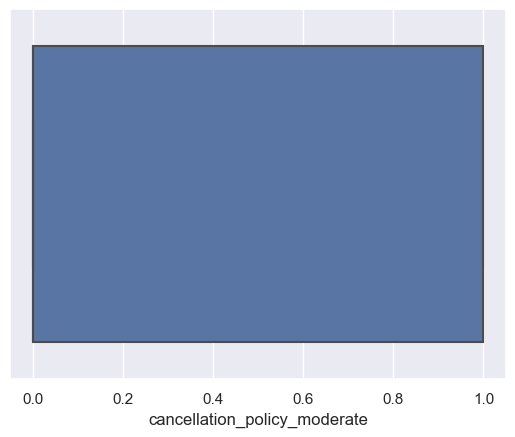

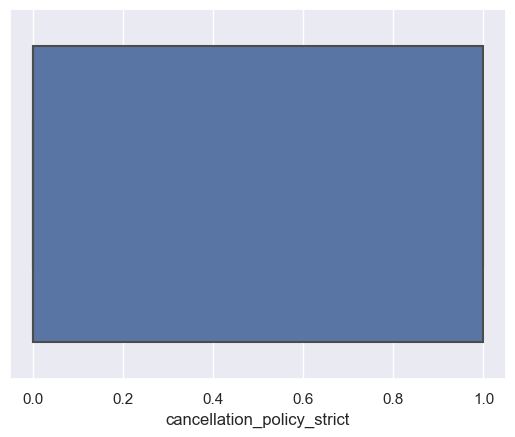

In [343]:
def boxplot(col):
    sns.boxplot( x = df[col])
    plt.show()

for i in list(df.select_dtypes(exclude = 'object').columns):
    boxplot(i)

# 4. Feature Scaling

In [344]:
df.describe()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_0,room_type_1,room_type_2,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
count,7.411100e+04,74111.000000,74111.0,74111.000000,74111.000000,74111.000000,74111.0,74111.000000,74111.000000,74111.000000,74111.000000,74111.0,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,3.018000,1.0,0.733967,0.262458,95.098393,1.0,1.590992,4.776082,0.557448,0.413366,0.0,0.304179,0.257182,0.438531
std,6.081735e+06,1.695008,0.0,0.442007,0.439973,4.552731,0.0,0.838687,0.696082,0.496692,0.492441,0.0,0.460062,0.437083,0.496211
min,3.440000e+02,1.000000,1.0,-1.000000,0.000000,84.000000,1.0,0.000000,2.963187,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.0,0.000000,0.000000,93.000000,1.0,1.000000,4.317488,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.225415e+07,2.000000,1.0,1.000000,0.000000,96.000000,1.0,1.000000,4.709530,1.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.640226e+07,4.000000,1.0,1.000000,1.000000,99.000000,1.0,2.000000,5.220356,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
max,2.123090e+07,7.000000,1.0,1.000000,1.000000,100.000000,1.0,3.500000,6.574657,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [345]:
# Feature scaling is not required as the data is spread very less variance

In [346]:
# divide the data into independent and dependent variable

In [347]:
x = df.drop(columns = ['log_price'])

In [348]:
y = df[['log_price']]

In [349]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_scaler = std.fit_transform(x)
pd.DataFrame(x_scaler).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.717787,-0.010620,0.0,0.60188,-0.596535,1.076637,0.0,-0.704668,0.891005,-0.839429,0.0,-0.661174,-0.588408,1.131520
1,-0.815840,2.349267,0.0,0.60188,1.676347,-0.460912,0.0,1.680028,0.891005,-0.839429,0.0,-0.661174,-0.588408,1.131520
2,-0.550376,1.169324,0.0,0.60188,1.676347,-0.680562,0.0,1.680028,0.891005,-0.839429,0.0,-0.661174,1.699500,-0.883767
3,0.353875,0.579352,0.0,0.60188,-0.596535,0.198038,0.0,0.487680,0.891005,-0.839429,0.0,1.512461,-0.588408,-0.883767
4,-1.226288,-0.600591,0.0,0.60188,1.676347,-2.437761,0.0,-0.704668,0.891005,-0.839429,0.0,-0.661174,1.699500,-0.883767


# Preprocessing
## 1.handling missing values - done
## 2.encoding - done
## 3.handling outlier - done
## 4.feature scaling - done
## 5.imbalance data to balance - Not required

# Advance EDA

<AxesSubplot:>

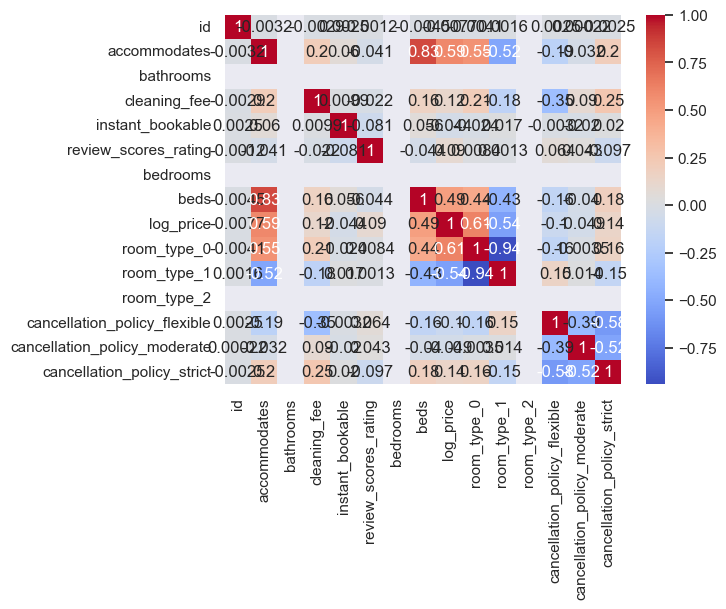

In [350]:
sns.heatmap(df.corr(), cmap = 'coolwarm' , annot = True)

In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable , i) for i in range(variable.shape[1])]
vif['features'] = x.columns

In [355]:
vif

,Variance Inflation Factor,features
0,1.000095,id
1,3.866443,accommodates
2,NaN,bathrooms
3,1.186844,cleaning_fee
4,1.014751,instant_bookable
5,1.018556,review_scores_rating
6,NaN,bedrooms
7,3.321015,beds
8,9.567242,room_type_0
9,9.014983,room_type_1


In [356]:
# More coorelation from 8 to 13 so we need to remove that

In [357]:
x.head()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_0,room_type_1,room_type_2,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,6901257,3.0,1.0,1,0,100.0,1.0,1.0,1,0,0.0,0,0,1
1,6304928,7.0,1.0,1,1,93.0,1.0,3.0,1,0,0.0,0,0,1
2,7919400,5.0,1.0,1,1,92.0,1.0,3.0,1,0,0.0,0,1,0
3,13418779,4.0,1.0,1,0,96.0,1.0,2.0,1,0,0.0,1,0,0
4,3808709,2.0,1.0,1,1,84.0,1.0,1.0,1,0,0.0,0,1,0


In [358]:
x = x.iloc[:,0:8]

In [359]:
x.head()

,id,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds
0,6901257,3.0,1.0,1,0,100.0,1.0,1.0
1,6304928,7.0,1.0,1,1,93.0,1.0,3.0
2,7919400,5.0,1.0,1,1,92.0,1.0,3.0
3,13418779,4.0,1.0,1,0,96.0,1.0,2.0
4,3808709,2.0,1.0,1,1,84.0,1.0,1.0


In [360]:
# Check duplicated data

In [361]:
df.duplicated().sum()

0

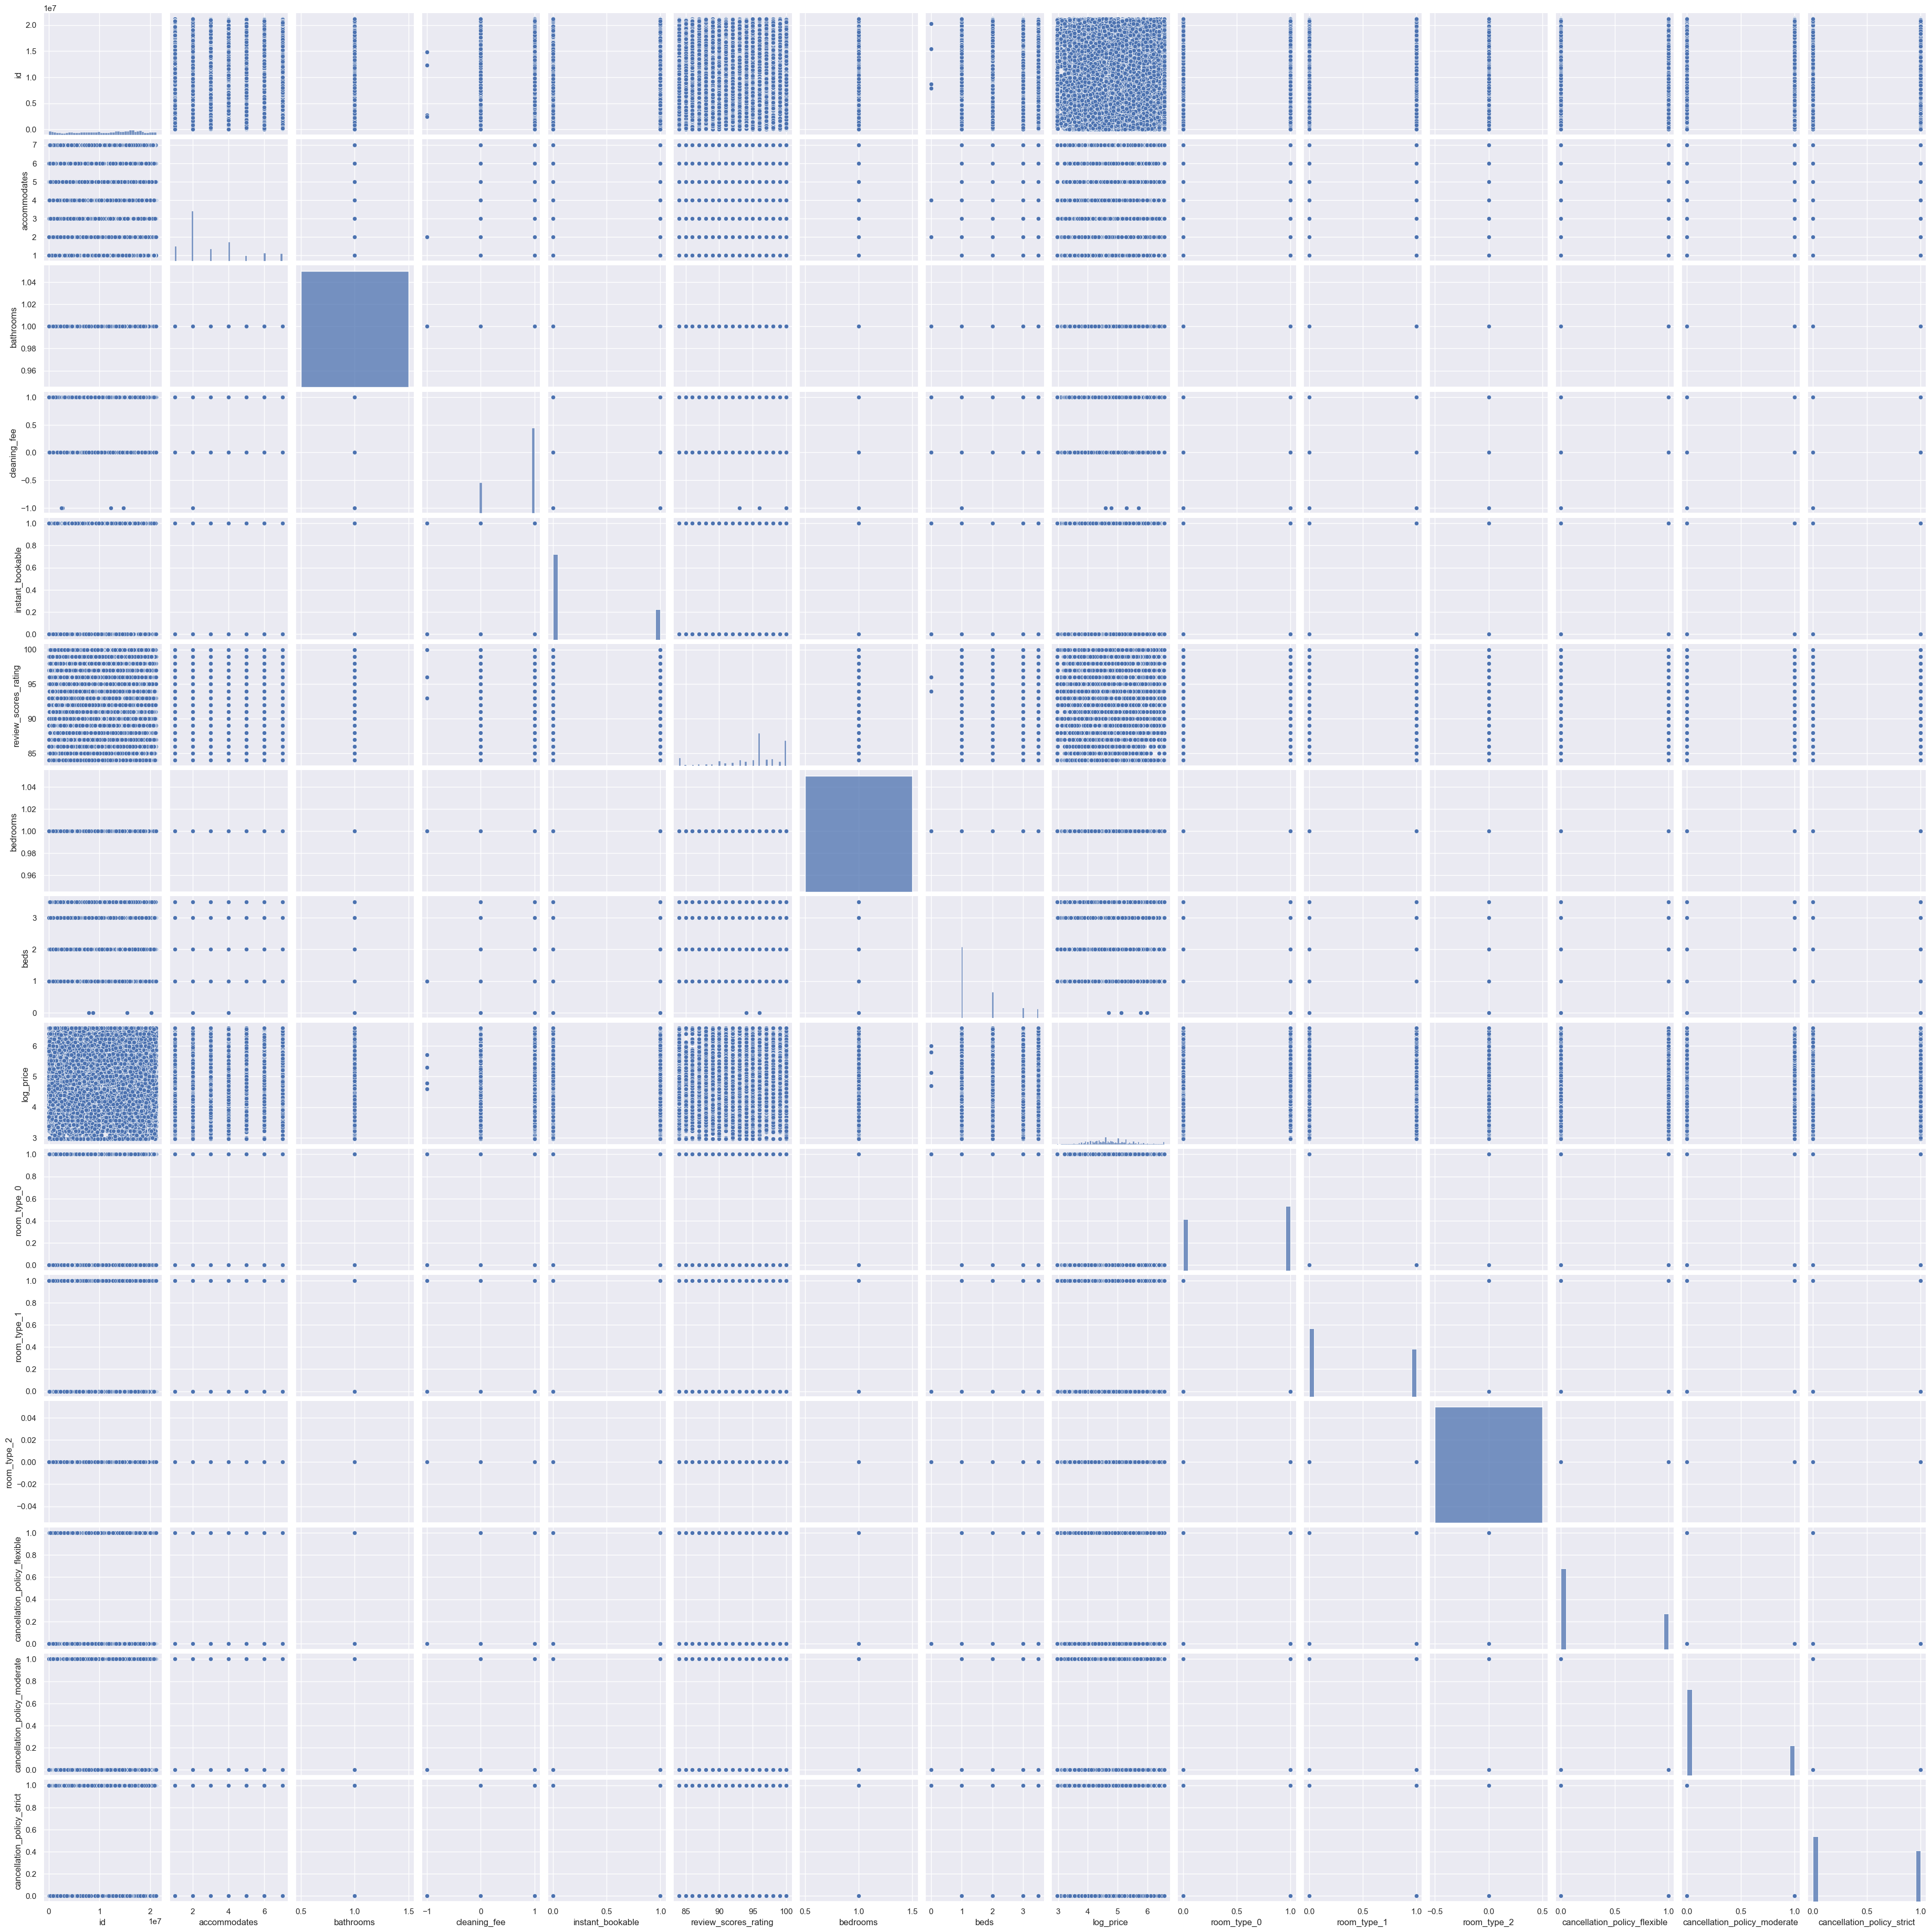

In [289]:
sns.pairplot(df)

# Divide the data into train and test

In [362]:
from sklearn.model_selection import train_test_split

In [363]:
x_train , x_test , y_train , y_split = train_test_split(x,y,test_size = 0.3 , random_state = 101)

In [364]:
print(x_train.shape , x_test.shape , y_train.shape , y_split.shape)

(51877, 8) (22234, 8) (51877, 1) (22234, 1)


# Build ols model

In [365]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sm

linear_model = sm.OLS(endog = y_train , exog = x_train).fit()

In [366]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     5077.
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        13:46:28   Log-Likelihood:                -42853.
No. Observations:               51877   AIC:                         8.572e+04
Df Residuals:                   51870   BIC:                         8.578e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
id                   -3.196e-10   3.99e-10     -0.801      0.423    -1.1e-09    4.63e-10
accommodates             0.2487      0.003     95.594      0.000       0.244       0.254
bathrooms                1.2344      0.026     47.488      0.000       1.183       1.285
cleaning_fee            -0.0047      0.006     -0.833      0.405      -0.016       0.006
instant_bookable        -0.1158      0.006    -20.864      0.000      -0.127      -0.105
review_scores_rating     0.0168      0.001     31.280      0.000       0.016       0.018
bedrooms                 1.2344      0.026     47.488      0.000       1.183       1.285
beds                    -0.0026      0.005     -0.504      0.615      -0.013       0.008
==============================================================================
Omnibus:                     1291.575   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2191.091
Skew:                           0.225   Prob(JB):                         0.00
Kurtosis:                       3.901   Cond. No.                     5.55e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [367]:
from sklearn.linear_model import LinearRegression

In [368]:
linear = LinearRegression()

In [371]:
linear.fit(x_train , y_train)

LinearRegression()

In [372]:
y_test_predict = linear.predict(x_test)

In [373]:
y_train_predict = linear.predict(x_train)

In [376]:
from sklearn.metrics import r2_score
r2_score(y_train , y_train_predict)

0.3699763232381551

In [378]:
r2_score(y_split , y_test_predict)

0.37193192463301594

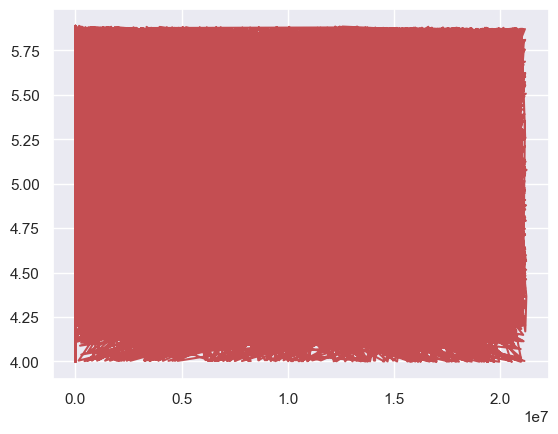

In [381]:

plt.plot(x_train, y_train_predict, color='r')
#plt.plot(x_test, y_pred_test, color='g')
plt.show()

In [382]:
from sklearn.preprocessing import PolynomialFeatures

In [383]:
poly = PolynomialFeatures(degree = 2, include_bias = True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [384]:
linear_1 = LinearRegression()
linear_1.fit(x_train_trans, y_train)

LinearRegression()

In [385]:
y_pred_train_ply = linear_1.predict(x_train_trans)
y_pred_test_ply = linear_1.predict(x_test_trans)

In [387]:
print(r2_score(y_train, y_pred_train_ply))
print()
print(r2_score(y_split, y_pred_test_ply))

0.37707364525010867

0.3763757571970958
